# Transverse isotropy linear elasticity

In [2]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from simmit import smartplus as sim
import os

In thermoelastic transversely isotropic materials eight parameters are required: 

1. The axis of transverse isotropy (1,2 or 3),
2. The axial Young modulus $E_L$,
3. The transverse Young modulus $E_T$,
4. The axial Poisson ratio $\nu_{TL}$,
5. The transverse Poisson ratio $\nu_{TT}$,
6. The axial shear modulus $G_{LT}$,
7. The axial coefficient of thermal expansion $\alpha_L$,
8. The transverse coefficient of thermal expansion $\alpha_T$.

When the axis of transverse isotropy is 1, the elastic stiffness tensor and the thermal expansion coefficients tensor are written in SMART+ formalism as

$$\boldsymbol{L}=\left(\begin{matrix} L_{1111} & L_{1122} & L_{1122} & 0 & 0 & 0 \\ L_{1122} & L_{2222} & L_{2233} & 0 & 0 & 0 \\ L_{1122} & L_{2233} & L_{2222} & 0 & 0 & 0 \\ 0 & 0 & 0 & L_{1212} & 0 & 0 \\ 0 & 0 & 0 & 0 & L_{1212} & 0 \\ 0 & 0 & 0 & 0 & 0 & L_{2323} \end{matrix}\right), \quad \boldsymbol{\alpha}=\left(\begin{matrix} \alpha_L & 0 & 0 \\ 0 & \alpha_T & 0 \\ 0 & 0 & \alpha_T \end{matrix}\right),$$

where $$\begin{array}{c}\displaystyle{L_{1111}=\frac{E_L}{\omega}~(\nu^2_{TT}-1), \quad L_{1122}=-\frac{E_L}{\omega}~\nu_{TL}~(1+\nu_{TT}), \quad L_{2222}=\frac{E_L~\nu^2_{TL}-E_T}{\omega},} \\ \displaystyle{L_{2233}=-\frac{E_L~\nu^2_{TL}+E_T~\nu_{TT}}{\omega}, \quad L_{1212}=G_{LT}, \quad L_{2323}=\frac{E_T}{2(1+\nu_{TT})},}\\ \displaystyle{\omega=\frac{1}{E_T}(1+\nu_{TT})~(2E_L~\nu^2_{TL}+E_T~(\nu_{TT}-1)).}\end{array}$$

Details on the elastic stiffness tensor of transversely isotropic media can be found in Christensen (1979). For axis of transverse isotropy being 2 or 3, the above tensors are properly rotated. The tangent stiffness tensor in this case is $\boldsymbol{L}^t=\boldsymbol{L}$. Moreover, the increment of the elastic strain is given by 

$$\Delta\varepsilon^{\textrm{el}}_{ij}=\Delta\varepsilon^{\textrm{tot}}_{ij}-\alpha_{ij}\Delta T.$$

In the 1D case only one component of stress is computed, through the relation 

$$\sigma^{\textrm{fin}}_{11}=\sigma^{\textrm{init}}_{11}+L_{1111}\Delta\varepsilon^{\textrm{el}}_{11}.$$

In the plane stress case only three components of stress are computed, through the relations 

$$\left(\begin{matrix} \sigma^{\textrm{fin}}_{11} \\ \sigma^{\textrm{fin}}_{22} \\ \sigma^{\textrm{fin}}_{12} \end{matrix}\right) =\left(\begin{matrix} \sigma^{\textrm{init}}_{11} \\ \sigma^{\textrm{init}}_{22} \\ \sigma^{\textrm{init}}_{12} \end{matrix}\right)+\boldsymbol{K} \left(\begin{matrix} \Delta\varepsilon^{\textrm{el}}_{11} \\ \Delta\varepsilon^{\textrm{el}}_{22} \\ 2\Delta\varepsilon^{\textrm{el}}_{12} \end{matrix}\right),$$

with $$\boldsymbol{K}=\left(\begin{matrix} \displaystyle{L_{1111}-\frac{L_{1133}L_{3311}}{L_{3333}}} & \displaystyle{L_{1122}-\frac{L_{1133}L_{3322}}{L_{3333}}} & \displaystyle{L_{1112}-\frac{L_{1133}L_{3312}}{L_{3333}}} \\ \displaystyle{L_{2211}-\frac{L_{2233}L_{3311}}{L_{3333}}} & \displaystyle{L_{2222}-\frac{L_{2233}L_{3322}}{L_{3333}}} & \displaystyle{L_{2212}-\frac{L_{2233}L_{3312}}{L_{3333}}} \\ \displaystyle{L_{1211}-\frac{L_{1233}L_{3311}}{L_{3333}}} & \displaystyle{L_{1222}-\frac{L_{1233}L_{3322}}{L_{3333}}} & \displaystyle{L_{1212}-\frac{L_{1233}L_{3312}}{L_{3333}}} \end{matrix}\right).$$

In the generalized plane strain/3D analysis case the stress tensor is computed through the relation

$$\sigma^{\textrm{fin}}_{ij}=\sigma^{\textrm{init}}_{ij}+L_{ijkl}~\Delta\varepsilon^{\textrm{el}}_{kl}.$$

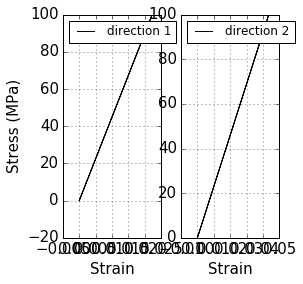

In [3]:
umat_name = 'ELIST' #This is the 5 character code for the elastic transversely isotropic subroutine
nstatev = 1 #The number of scalar variables required, only the initial temperature is stored here

rho = 1.12 #The density of the material 
c_p = 1.64 #The specific heat capacity

axis = 1
E_L = 4500
E_T = 2300
nu_TL = 0.05
nu_TT = 0.3
G_LT = 2700
alpha_L = 1.E-5
alpha_T = 2.5E-5

props = np.array([axis, E_L, E_T, nu_TL, nu_TT, G_LT, alpha_L, alpha_T])

dir = os.path.dirname(os.path.realpath('__file__'))
pathfile = dir + '/path_1.txt'
outputfile_1 = dir + '/results_ELIST_1.txt'

sim.solver(umat_name, props, nstatev, rho, c_p, pathfile, outputfile_1)

pathfile = dir + '/path_2.txt'
outputfile_2 = dir + '/results_ELIST_2.txt'
sim.solver(umat_name, props, nstatev, rho, c_p, pathfile, outputfile_2)

fig = plt.figure()
pylab.rcParams['figure.figsize'] = (16.0, 5.0) #configure the figure output size

ax = fig.add_subplot(1, 3, 1)

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_1, usecols=(7,8,9,10,11,12,13,14,15,16,17,18), unpack=True)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Strain', size = 15)
plt.ylabel('Stress (MPa)', size = 15)
plt.plot(e11,s11, c='black', label='direction 1')
plt.legend(loc=2)

ax = fig.add_subplot(1, 3, 2)

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_2, usecols=(7,8,9,10,11,12,13,14,15,16,17,18), unpack=True)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Strain', size = 15)
#plt.ylabel('Stress (MPa)')
plt.plot(e22,s22, c='black', label='direction 2')
plt.legend(loc=2)

plt.show()

Quick verification, we will take the slope of the stress-strain curve and find out if it does correspond to E_L. For that one can take the last value of s11 and e11. Same for E_T and s22 and e_22 for the second plot.

In [4]:
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_1, usecols=(7,8,9,10,11,12,13,14,15,16,17,18), unpack=True)

sigma_verif = np.amax(s11)
eps_verif1 = np.amax(e11)
eps_verif2 = np.amin(e22)

E_L_verif = sigma_verif/eps_verif1

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_2, usecols=(7,8,9,10,11,12,13,14,15,16,17,18), unpack=True)
sigma_verif = np.amax(s22)
eps_verif1 = np.amin(e11)
eps_verif2 = np.amax(e22)
eps_verif3 = np.amin(e33)

E_T_verif = sigma_verif/eps_verif2
nu_TL_verif = -eps_verif1/eps_verif2
nu_TT_verif = -eps_verif3/eps_verif2

print(E_L_verif)
print(E_T_verif)
print(nu_TL_verif)
print(nu_TT_verif)

4500.0045
2299.99793
0.0499998850001
0.30000023
